## Entendiendo la transformada de Fourier 2D
## Caso 1D
Consideremos las siguientes funciones:

\begin{equation}
u_1(x)= u_0 + 0.5\sin(\pi x)
\end{equation}

\begin{equation}
u_2(x)= u_0 + 0.25(\sin(\pi x)+ \sin(12\pi x))
\end{equation}

\begin{equation}
u_3(x)= u_0 + 0.2(\sin(\pi x)+ x\sin(12\pi x)+2\sin(3\pi x))
\end{equation}

In [1]:
#Carga de paquetes
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [2]:
#Definición de dominio numérico
nx = 2**10 #numero de samples
lim = 10.0*np.pi #limite superior
x  = np.linspace(0.0, lim, nx) #vector con los samples
dx = lim/(nx-1.0) #espaciamiento

In [4]:
#Definición de funciones
u0 = 10.0
f1 = u0 + 0.5*np.sin(np.pi*x)
f2 = u0 + 0.25*(np.sin(np.pi*x)+np.sin(12*np.pi*x))
f3 = u0 + 0.2*(np.sin(np.pi*x)+x*np.sin(12*np.pi*x)+2*np.sin(3*np.pi*x))

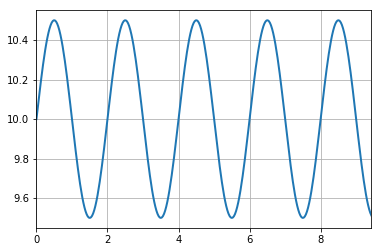

In [5]:
#Gráfico de f1
plt.plot(x, f1,lw=2)
plt.xlim(0,3*np.pi)
plt.grid()
plt.show()

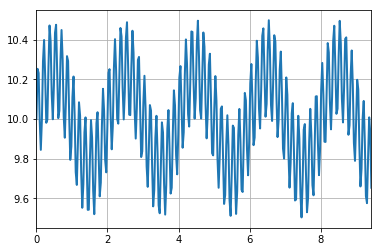

In [6]:
#Gráfico de f2
plt.plot(x, f2,lw=2)
plt.xlim(0,3*np.pi)
plt.grid()
plt.show()

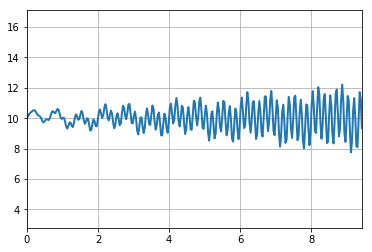

In [7]:
#Gráfico de f3
plt.plot(x, f3,lw=2)
plt.xlim(0,3*np.pi)
plt.grid()
plt.show()

Sus transformadas (discretas) de Fourier respectivas:

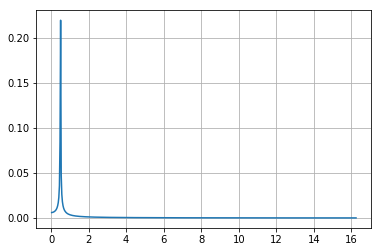

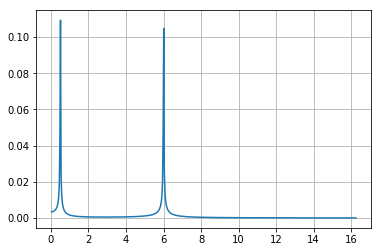

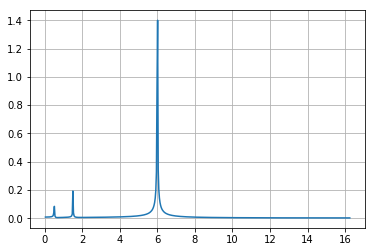

In [8]:
fft_f1 =np.fft.fft(f1,nx)
#fft_f1 =np.fft.fftshift(fft_f1)
fft_f2 =np.fft.fft(f2,nx)
fft_f3 =np.fft.fft(f3,nx)

f_frec =np.fft.fftfreq(nx,dx)
#f_frec =np.fft.fftshift(f_frec)

#plt.xlim(0,2)
plt.grid()
plt.plot(f_frec[1:nx//2], 1/nx*np.abs(fft_f1[1:nx//2]))
plt.show();
plt.grid()
plt.plot(f_frec[1:nx//2], 1/nx*np.abs(fft_f2[1:nx//2]))
plt.show();
plt.grid()
plt.plot(f_frec[1:nx//2], 1/nx*np.abs(fft_f3[1:nx//2]))
plt.show();

## Caso 2D
Consideramos
\begin{equation}
f(x,y) = u_0 + 0.5\sin(\pi x) + 0.5\sin(2\pi y) + 2\sin(4\pi(x+y))
\end{equation}

In [9]:
#Definición del dominio numérico
nx2 = 2**10
ny2 = 2**10
lim = 0.5*np.pi #limite superior
x2  = np.linspace(0, lim, nx2)
y2  = np.linspace(0, lim, ny2)
x2,y2 =np.meshgrid(x2,y2)

dx = lim/(nx2-1.0) #espaciamiento en x
dy = lim/(ny2-1.0) #espaciamiento en y

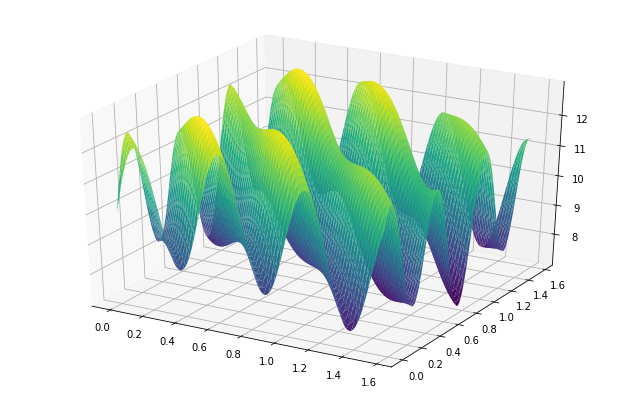

In [10]:
#Definición de funciones
#ff1 = u0 + np.sin(np.pi*x2*y2)+0.2*np.sin(2*np.pi*y2*x2**0.5)
#ff2 = np.sin(np.pi*x)+np.sin(12*np.pi*x)
#ff3 = np.sin(np.pi*x)+x*np.sin(12*np.pi*x)+2*np.sin(3*np.pi*x)
u0 = 10.0
ff1 = u0 + 0.5*np.sin(np.pi*x2) + 0.5*np.sin(2*np.pi*y2) + 2*np.sin(4*np.pi*(x2+y2))
fig = plt.figure(figsize=(11,7))
ax = fig.gca(projection='3d')
ax.plot_surface(x2,y2,ff1, cmap='viridis');
#ax.set_xlim(0,0.5*np.pi);ax.set_ylim(0,0.5*np.pi);ax.set_zlim(9,11)

In [11]:
#Definición del dominio numérico
nx2 = 2**11
ny2 = 2**11
lim = 200.0 #limite superior
x2  = np.linspace(0, lim, nx2)
y2  = np.linspace(0, lim, ny2)
x2,y2 =np.meshgrid(x2,y2)

dx = lim/(nx2-1.0) #espaciamiento en x
dy = lim/(ny2-1.0) #espaciamiento en y

print(dx,dy)

print(0.5/dx) #Nyquist
ff1 = u0 + 0.5*np.sin(np.pi*x2) + 0.5*np.sin(2*np.pi*y2) + 2*np.sin(4*np.pi*(x2+y2))

0.09770395701025891 0.09770395701025891
5.1175


In [14]:
#Frecuencias en x
f_frec=np.fft.fftfreq(nx2,dx)
fft_ff1 = np.zeros((nx2,ny2),dtype=complex)
for i in range(len(y2)):
    fft_ff1[i,:] =np.fft.fft(ff1[i,:],nx2)
    '''
    plt.grid()
    plt.loglog(f_frec[1:nx2//2], 1/(nx2)*np.abs(fft_ff1[i,1:nx2//2]))
    plt.gca().xaxis.grid(True, which='minor')
    plt.xscale('symlog')
    plt.yscale('symlog')
    plt.xlim(0,1000)
    plt.show();
    '''
print("ok!")

ok!


ok!


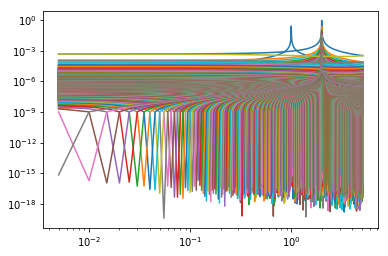

In [15]:
#Frecuencias en y
f_frec=np.fft.fftfreq(ny2,dy)
fft_ff2 = np.zeros((nx2,ny2),dtype=complex)
for i in range(len(x2)):
    fft_ff2[:,i] =np.fft.fft(fft_ff1[:,i],nx2)
    plt.grid()
    plt.loglog(f_frec[1:ny2//2], 1/(ny2*nx2)*np.abs(fft_ff2[1:ny2//2,i]))
print("ok!")

In [14]:
#almacenamiento de valores de la transformada
frec_x=np.fft.fftfreq(nx2,dx)
frec_y=np.fft.fftfreq(ny2,dy)

k_vec     = np.zeros(nx2*ny2)
abs_fft_u = np.zeros_like(k_vec)
for i in range(nx2):
    for j in range(ny2):
        k_vec[nx2*i+j]     = np.sqrt(frec_x[i]**2+frec_y[j]**2)
        abs_fft_u[nx2*i+j] = np.abs(fft_ff2[i,j])
print("ok!")

ok!


In [15]:
# Ordenar el vector
result = np.zeros((2,nx2*ny2))
result[0,:]=k_vec
result[1,:]=abs_fft_u
idx = np.argsort(result[0])
result2 = result[:,idx]
#a[a[:,1].argsort()]

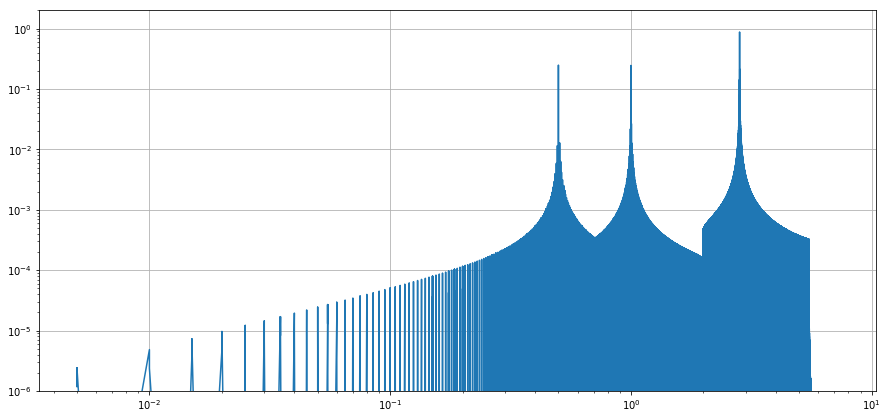

In [18]:
# Gráfico del espectro para el número de onda
plt.figure(figsize=(15,7))
plt.grid()
plt.ylim(1e-6,2)
plt.loglog(result2[0,1:], 1/(nx2*ny2)*result2[1,1:])
plt.show();

In [ ]:
f_frec =np.fft.fftfreq(nx,dx)
#f_frec =np.fft.fftshift(f_frec)

#plt.xlim(0,2)
plt.grid()
plt.plot(f_frec[1:nx//2], 1/nx*np.abs(fft_f1[1:nx//2]))
plt.show();
plt.grid()
plt.plot(f_frec[1:nx//2], 1/nx*np.abs(fft_f2[1:nx//2]))
plt.show();
plt.grid()
plt.plot(f_frec[1:nx//2], 1/nx*np.abs(fft_f3[1:nx//2]))
plt.show();

### Ejemplo Video

[[ 22  34  43  47  43  34  22]
 [ 34  51  66  72  66  51  34]
 [ 43  66  85  92  85  66  43]
 [ 47  72  92 100  92  72  47]
 [ 43  66  85  92  85  66  43]
 [ 34  51  66  72  66  51  34]
 [ 22  34  43  47  43  34  22]]


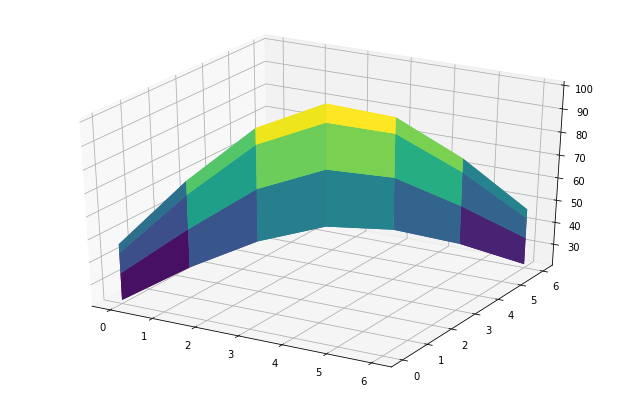

In [136]:
#Ejemplo video
a=np.array([[22,34,43,47,43,34,22],[34,51,66,72,66,51,34],[43,66,85,92,85,66,43],[47,72,92,100,92,72,47],[43,66,85,92,85,66,43],[34,51,66,72,66,51,34],[22,34,43,47,43,34,22]])
fig = plt.figure(figsize=(11,7))
ax = fig.gca(projection='3d')
ax.plot_surface(np.arange(0,7),np.arange(0,7),a, cmap='viridis');
print(a)

In [137]:
print(len(a))

7


In [138]:
f_frec=np.fft.fftfreq(len(a))
fft_a = np.zeros_like(a,dtype=complex)
for i in range(len(a)):
    fft_a[i,:] =np.fft.fft(a[i,:],7)
print(fft_a)
for i in range(len(a)):
    fft_a2=np.fft.fft(fft_a[i,:],7)
    print(fft_a2)

[[ 2.45000000e+02 +0.j         -4.13058811e+01-19.89186396j
  -3.72169296e+00 -4.66685536j -4.72425915e-01 -2.06983318j
  -4.72425915e-01 +2.06983318j -3.72169296e+00 +4.66685536j
  -4.13058811e+01+19.89186396j]
 [ 3.74000000e+02 +0.j         -6.33720199e+01-30.51835632j
  -4.28604427e+00 -5.37452953j -3.41935840e-01 -1.4981188j
  -3.41935840e-01 +1.4981188j  -4.28604427e+00 +5.37452953j
  -6.33720199e+01+30.51835632j]
 [ 4.80000000e+02 +0.j         -8.21117622e+01-39.5429406j
  -6.94338593e+00 -8.70673056j -4.44851831e-01 -1.94902322j
  -4.44851831e-01 +1.94902322j -6.94338593e+00 +8.70673056j
  -8.21117622e+01+39.5429406j ]
 [ 5.22000000e+02 +0.j         -8.82841694e+01-42.51541522j
  -7.52884352e+00 -9.44087116j -6.86987095e-01 -3.00988713j
  -6.86987095e-01 +3.00988713j -7.52884352e+00 +9.44087116j
  -8.82841694e+01+42.51541522j]
 [ 4.80000000e+02 +0.j         -8.21117622e+01-39.5429406j
  -6.94338593e+00 -8.70673056j -4.44851831e-01 -1.94902322j
  -4.44851831e-01 +1.94902322j -6.9

In [140]:
print(fft_a)

[[ 2.45000000e+02 +0.j         -4.13058811e+01-19.89186396j
  -3.72169296e+00 -4.66685536j -4.72425915e-01 -2.06983318j
  -4.72425915e-01 +2.06983318j -3.72169296e+00 +4.66685536j
  -4.13058811e+01+19.89186396j]
 [ 3.74000000e+02 +0.j         -6.33720199e+01-30.51835632j
  -4.28604427e+00 -5.37452953j -3.41935840e-01 -1.4981188j
  -3.41935840e-01 +1.4981188j  -4.28604427e+00 +5.37452953j
  -6.33720199e+01+30.51835632j]
 [ 4.80000000e+02 +0.j         -8.21117622e+01-39.5429406j
  -6.94338593e+00 -8.70673056j -4.44851831e-01 -1.94902322j
  -4.44851831e-01 +1.94902322j -6.94338593e+00 +8.70673056j
  -8.21117622e+01+39.5429406j ]
 [ 5.22000000e+02 +0.j         -8.82841694e+01-42.51541522j
  -7.52884352e+00 -9.44087116j -6.86987095e-01 -3.00988713j
  -6.86987095e-01 +3.00988713j -7.52884352e+00 +9.44087116j
  -8.82841694e+01+42.51541522j]
 [ 4.80000000e+02 +0.j         -8.21117622e+01-39.5429406j
  -6.94338593e+00 -8.70673056j -4.44851831e-01 -1.94902322j
  -4.44851831e-01 +1.94902322j -6.9